In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import logging
from pathlib import Path
import random

import torch
import torchvision as tv
from torchvision.transforms import v2 as transforms

import bb
import tt

LOG = logging.getLogger(__name__)
tt.logging_init()

SEED = 325
random.seed(SEED)

In [4]:
data_path = Path.home() / "src/data"
mc_data_path = data_path / "minecraft/info.json"
dset = bb.Dataset.load(mc_data_path)
torch_root = data_path / "torchvision"

IMAGES_PATH = str(torch_root / "COCO/val2017")
ANNOTATIONS_PATH = str(torch_root / "COCO/annotations/instances_val2017.json")

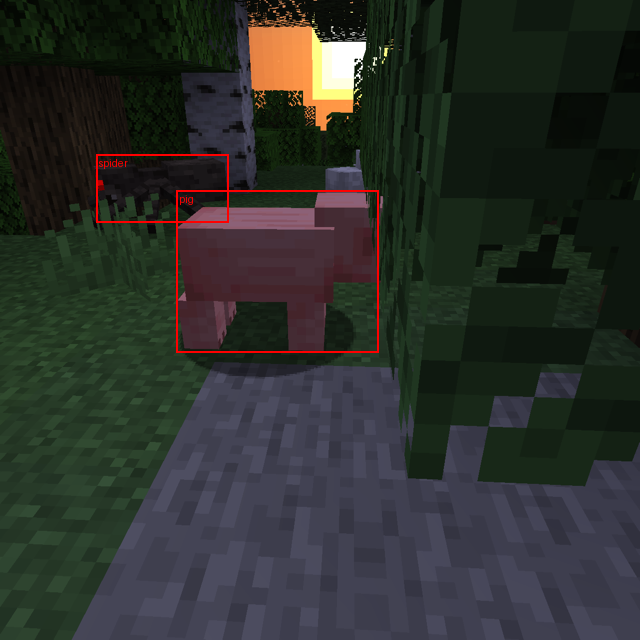

In [47]:
from torchvision import utils
img, target = tdset[10]
categories = tdset.dset.categories
label_names = [categories[label.item()] for label in target["labels"]]
result = utils.draw_bounding_boxes(img, boxes=target["boxes"], labels=label_names, colors="red", width=2)
transforms.functional.to_pil_image(result)

In [51]:
target["boxes"]

BoundingBoxes([[176.0000, 190.0800, 378.8800, 352.0000],
               [ 96.0000, 154.8800, 228.4800, 222.0800]], format=BoundingBoxFormat.XYXY, canvas_size=(640, 640), clamping_mode=soft)

In [52]:
type(img)

torchvision.tv_tensors._image.Image

In [23]:
print(img.dtype, img.shape)

torch.uint8 torch.Size([4, 640, 640])


In [ ]:
coco_dataset = tv.datasets.CocoDetection(IMAGES_PATH, ANNOTATIONS_PATH)
dataset = tv.datasets.wrap_dataset_for_transforms_v2(coco_dataset)

sample = dataset[0]
img, target = sample
print(type(img))
target

In [ ]:
coco_categories = {
    cat["id"]: cat["name"] for cat in dataset.coco.loadCats(dataset.coco.getCatIds())
}
print(coco_categories)
label_names = [coco_categories[label.item()] for label in target["labels"]]
print(label_names)